In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
%matplotlib inline

---
# Part 1

set parameters

In [2]:
NX    = 10
NY    = 10
XMIN  = 0
XMAX  = 1
YMIN  = 0
YMAX  = 1
NITER = 30  # max number of iterations

Initialize the grids

In [3]:
u = np.zeros(shape=(NX,NY))

set initial conditions (assume 0 everywhere)

In [4]:
def initial(u,nx=NX,ny=NY):
    u[:,:] = 0
    return u

Boundary conditions

In [5]:
def set_boundary_conditions(u,nx=NX,ny=NY):
    """
    Input: u[i][j]
    
    Output: u[i][j]
    
    B.C.: top    (y=1): u = 1
          button (y=0): u = 0
          left   (x=0): u = 0
          right  (x=1): u = 0
    """
    u[:,-1] = 1
    u[:,0]  = 0
    u[0,:]  = 0
    u[-1,:] = 0

    return u

## Jacobi method
Do one iteration

In [6]:
def evolve_jacobi(u,nx=NX,ny=NY):
    """
    do one Jacobi iteration
    
    Inputs: u[size of NX][size of NY]
    NX: number of points in x-axis
    NY: number of points in y-axis
    
    Outputs: u
    
    """
    uold = u.copy()

    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u[i,j] = 0.25*(uold[i+1,j]+uold[i-1,j]+uold[i,j+1]+uold[i,j-1])

    return u

Check convergence by comparing the differecne between u1 and u2

In [7]:
def diff(u1,u2,nx=NX,ny=NY):
    error = 0.0
    for i in range(nx):
        for j in range(ny):
            error += abs(u1[i,j] - u2[i,j])
    return error

Start iterations

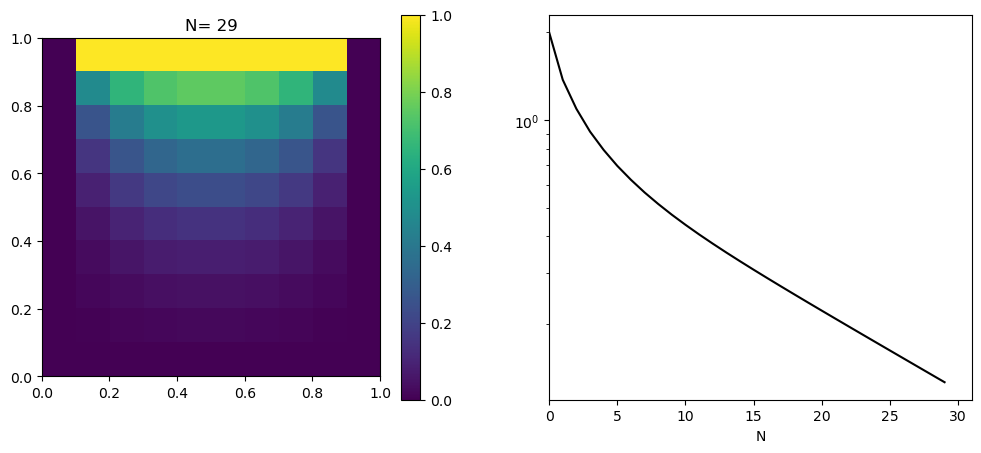

In [8]:
u = initial(u)
u = set_boundary_conditions(u)
errors = np.zeros(NITER)
for n in range(NITER):
    
    plt.figure(1,figsize=(12,5))
    plt.subplot(121)
    plt.title("N= {}".format(n))
    clear_output(wait=True)
    
    # make a copy of the u in the previous step
    uold = u.copy()
    
    # do one iteration
    u = evolve_jacobi(u)
    
    # check the difference
    err = diff(uold,u)
    errors[n] = err
    
    # plot the results
    plt.imshow(u.T,origin='lower',extent=[XMIN,XMAX,YMIN,YMAX],interpolation='none')
    plt.colorbar()
    plt.subplot(122)
    plt.plot(errors,'k-')
    plt.xlim([0,NITER+1])
    plt.xlabel("N")
    plt.yscale('log')
    #time.sleep(0.0001)
    plt.show()

---
# Part 2

## Gauss-Seidel method

In [9]:
def evolve_gauss_seidel(u,nx=NX,ny=NY):
    """
    do one Gauss-Seidel iteration
    """
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u[i,j] = 0.25*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1])
    return u

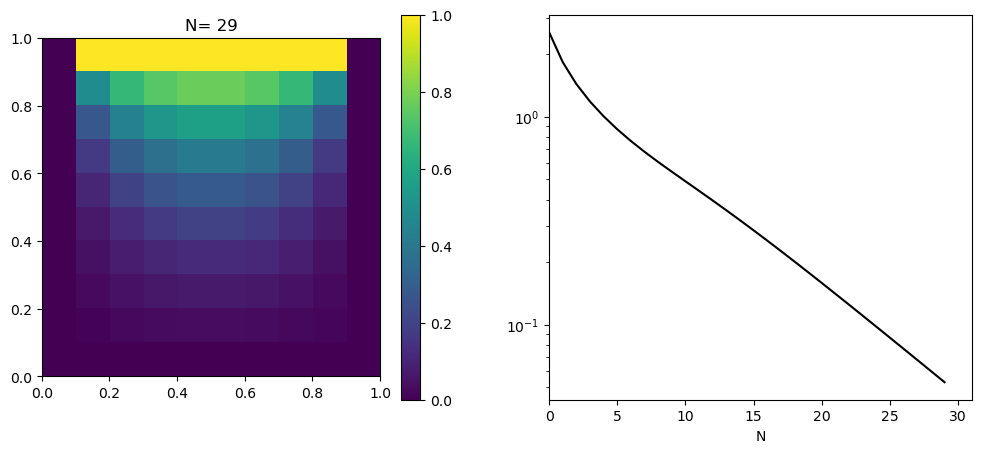

In [10]:
u = initial(u)
u = set_boundary_conditions(u)
errors = np.zeros(NITER)
for n in range(NITER):
    
    plt.figure(1,figsize=(12,5))
    plt.subplot(121)
    plt.title("N= {}".format(n))
    clear_output(wait=True)
    
    # make a copy of the u in the previous step
    uold = u.copy()
    
    # do one iteration
    u = evolve_gauss_seidel(u)
    
    # check the difference
    err = diff(uold,u)
    errors[n] = err
    
    # plot the results
    plt.imshow(u.T,origin='lower',extent=[XMIN,XMAX,YMIN,YMAX],interpolation='none')
    plt.colorbar()
    plt.subplot(122)
    plt.plot(errors,'k-')
    plt.xlim([0,NITER+1])
    plt.xlabel("N")
    plt.yscale('log')
    #time.sleep(0.0001)
    plt.show()

---
# Part 3

## Successive over-relax method:

w < 1 : under-relaxation
w = 1 : Gauss-Seidel method
w > 1 : over-relaxation

In [11]:
def evolve_sor(u,omega,nx=NX,ny=NY):
    """
    do one SOR iteration
    """
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u[i,j] = (1-omega)*u[i,j] + omega*0.25*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1])
    return u

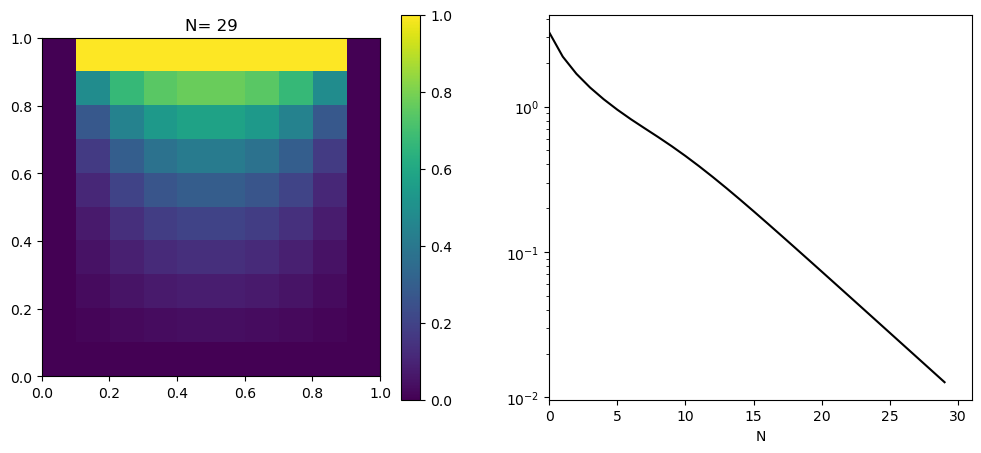

In [12]:
u = initial(u)
u = set_boundary_conditions(u)
errors = np.zeros(NITER)
for n in range(NITER):   
    plt.figure(1,figsize=(12,5))
    plt.subplot(121)
    plt.title("N= {}".format(n))
    clear_output(wait=True)

    # make a copy of the u in the previous step
    uold = u.copy()

    # do one iteration
    u = evolve_sor(u,omega=1.2)

    # check the difference
    err = diff(uold,u)
    errors[n] = err

    # plot the results
    plt.imshow(u.T,origin='lower',extent=[XMIN,XMAX,YMIN,YMAX],interpolation='none')
    plt.colorbar()
    plt.subplot(122)
    plt.plot(errors,'k-')
    plt.xlim([0,NITER+1])
    plt.xlabel("N")
    plt.yscale('log')
    #time.sleep(0.0001)
    plt.show()

---
# Part 4

## Multi-grid method

In [ ]:
NX1   = 25
NY1   = 25
NX2   = 50
NY2   = 50
NX3   = 100
NY3   = 100
NITER = 100
u1 = np.zeros(shape=(NX1,NY1))
u2 = np.zeros(shape=(NX2,NY2))
u3 = np.zeros(shape=(NX3,NY3))

In [ ]:
def restriction(u_fine,u_coarser,NXC,NYC):
    """
    from fine grid to coarser grid.
    Assume the gird size is different by a factor of 2
    
    update the coarser grid based on information of the fine grid
    
    Inputs:
    
    u_fine: size of 2 NXC and 2 NYC
    u_coarser: size of NXC and NYC
    
    
    Outputs:
    
    u: size of NXC and NYC
    
    
    """
    return uout  

In [ ]:
def prolongation(u_fine, u_coarser,NXC, NYC):
    """
    from coarser grid to fine grid
    
    update the fine grid based on information of the coarser grid
    
    Inputs:
    
    u_fine: size of 2 NXC and 2 NYC
    u_coarser: size of NXC and NYC
    
    
    Outputs:
    
    u: size of 2 NXC and 2 NYC
    
    """

    # To simplify the problem, we could do direct mapping without interpolation
                
    return uout

In [ ]:
#TODO: To the full multigird cycle here and Visualize the results